In [242]:
import pandas as pd
import numpy as np
import plotly.express as px
from copy import copy
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn import preprocessing
import yfinance as yf

# Captial Asset Pricing Model

# Web Scraping Mag 7

In [243]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META','^GSPC']
def period (start_i,end_i):
    stock_data = yf.download(tickers, start=start_i, end=end_i)

    # Extract only the "Close" prices
    close_prices = stock_data['Close']
    close_prices.to_csv(f'MAG7_close_P_{start_i}_{end_i}.csv')
    
    print(f'File name:    MAG7_close_P_{start_i}_{end_i}.csv')
    print("Close prices have been saved successfully!")
    print()

In [244]:
infos = []
for i in tickers:
    info = yf.Ticker(i).info  # Get company info
    infos.append(info)        # Append the info dictionary to the list

# Print brief company information
print('Companies information')
for company_info in infos:
    print(f"Company: {company_info.get('longName', 'N/A')}")
#     print(f"Sector: {company_info.get('sector', 'N/A')}")
#     print(f"Industry: {company_info.get('industry', 'N/A')}")
    print(f"Market Cap: {company_info.get('marketCap', 'N/A')}")
#     print(f"Country: {company_info.get('country', 'N/A')}")
    print("-" * 30)  # Divider for readability

Companies information
Company: Apple Inc.
Market Cap: 3296096681984
------------------------------
Company: Microsoft Corporation
Market Cap: 3234487336960
------------------------------
Company: Alphabet Inc.
Market Cap: 1966470856704
------------------------------
Company: Amazon.com, Inc.
Market Cap: 1961417768960
------------------------------
Company: NVIDIA Corporation
Market Cap: 2835422642176
------------------------------
Company: Tesla, Inc.
Market Cap: 727962550272
------------------------------
Company: Meta Platforms, Inc.
Market Cap: 1356780404736
------------------------------
Company: S&P 500
Market Cap: N/A
------------------------------


# Select Period

In [245]:
# 6 months
period('2024-03-16','2024-09-16')
# 2 years
period('2022-09-16','2024-09-16')
# 1 years
period('2023-09-16','2024-09-16')

[*********************100%***********************]  8 of 8 completed
[**********************50%                       ]  4 of 8 completed

File name:    MAG7_close_P_2024-03-16_2024-09-16.csv
Close prices have been saved successfully!



[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed


File name:    MAG7_close_P_2022-09-16_2024-09-16.csv
Close prices have been saved successfully!

File name:    MAG7_close_P_2023-09-16_2024-09-16.csv
Close prices have been saved successfully!



# Copy File Name Create Data Spreadsheet

In [246]:
data_6m = pd.read_csv('MAG7_close_P_2024-03-16_2024-09-16.csv')
data_1y = pd.read_csv('MAG7_close_P_2023-09-16_2024-09-16.csv')
data_2y = pd.read_csv('MAG7_close_P_2022-09-16_2024-09-16.csv')

# File name for redirect purposes
This list have to be predefine before we move forward

In [247]:
data_time_frame = [data_6m,data_1y,data_2y]

# Normalization, i/i[0] Data Visualizing

In [248]:
def norm(df):
    x = df.copy()
    for i in x.columns[1:]: 
        x[i] = x[i]/x[i][0]
    return x

# Data Visualization Applied

In [249]:
def interactive_plot(data,title):
    fig = px.line(title = title)
    for i in data.columns[1:]:
        fig.add_scatter(x=data['Date'],y = data[i], name = i)
    fig.show()

In [250]:
name_graph = ['6 Months','1 Year','2 Years']
for i,j in zip(data_time_frame,name_graph):
    interactive_plot(norm(i),j)
#     interactive_plot(i,j)

# Calculate daily returns

Excel = IF(B3=0, 0, (B3-B2)/B2*100)



In [251]:
def cal_daily_return(data):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = (x[i] - x[i].shift(1)) / x[i].shift(1) * 100
        x[i].fillna(0, inplace=True)  # Handle the NaN for the first row
    return x

In [252]:
daily_returns_dict = {}

for df, label in zip(data_time_frame, name_graph):
    # Calculate daily returns
    daily_returns = cal_daily_return(df)
    
    # Save the DataFrame to the dictionary
    daily_returns_dict[label] = daily_returns
    
    # Optionally, save to CSV file
    daily_returns.to_csv(f'{label}_daily_returns.csv', index=False)
    print(f'{label}_daily_returns.csv')

6 Months_daily_returns.csv
1 Year_daily_returns.csv
2 Years_daily_returns.csv


# Risk Free Rate

In [253]:
rf = 0.037

# Plot Daily Returns

6 M_AAPL beta is 1.04
Estimated Market Return 7.65%


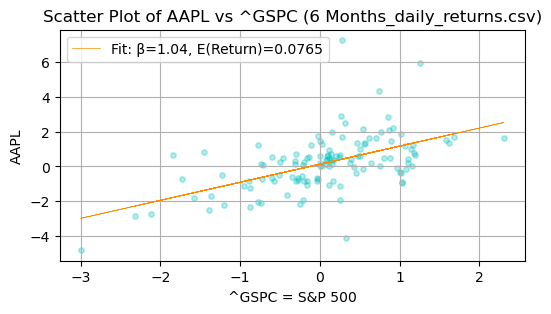

6 M_MSFT beta is 1.11
Estimated Market Return 7.91%


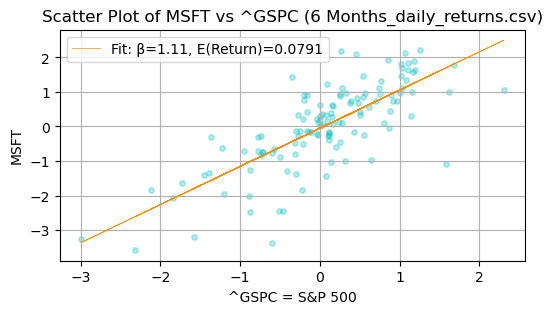

6 M_GOOGL beta is 1.25
Estimated Market Return 8.45%


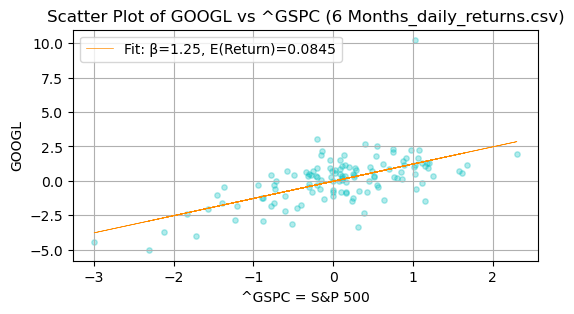

6 M_AMZN beta is 1.43
Estimated Market Return 9.13%


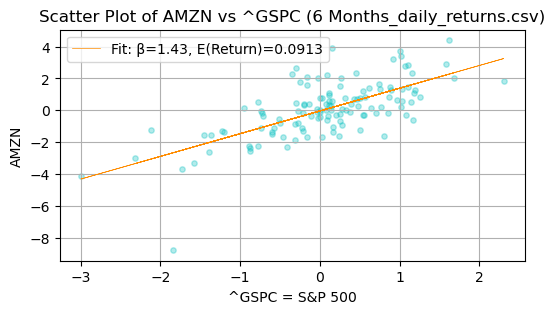

6 M_NVDA beta is 2.94
Estimated Market Return 14.89%


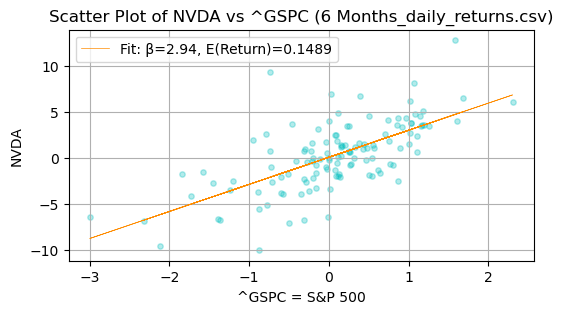

6 M_TSLA beta is 2.40
Estimated Market Return 12.84%


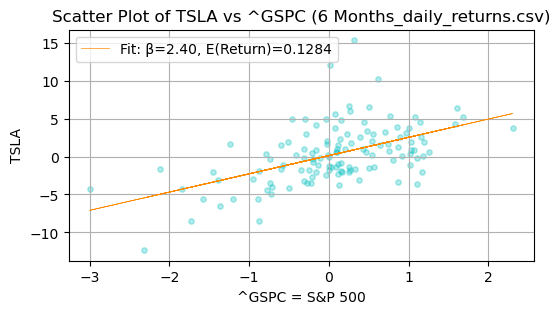

6 M_META beta is 1.34
Estimated Market Return 8.78%


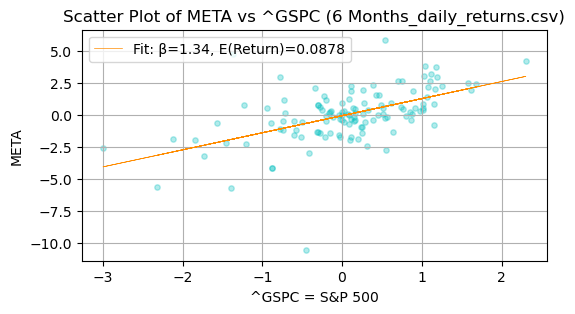

6 M_^GSPC beta is 1.00
Estimated Market Return 7.50%


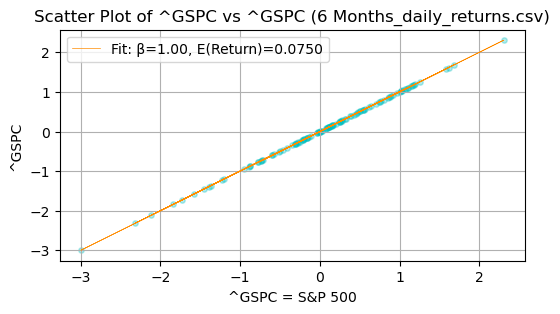

1 Y_AAPL beta is 0.97
Estimated Market Return 9.54%


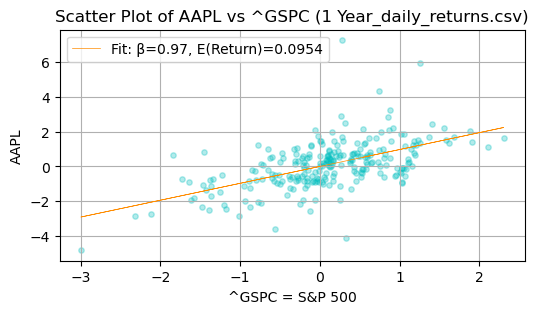

1 Y_MSFT beta is 1.09
Estimated Market Return 10.25%


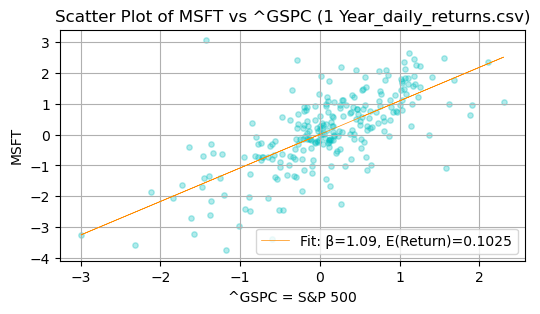

1 Y_GOOGL beta is 1.31
Estimated Market Return 11.60%


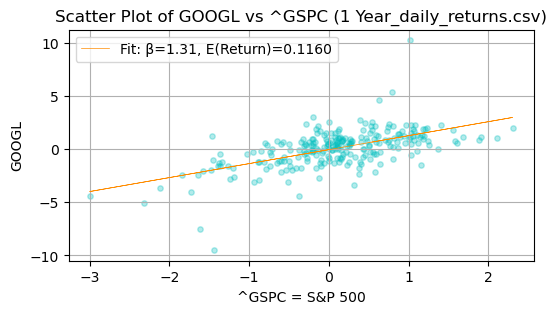

1 Y_AMZN beta is 1.55
Estimated Market Return 12.99%


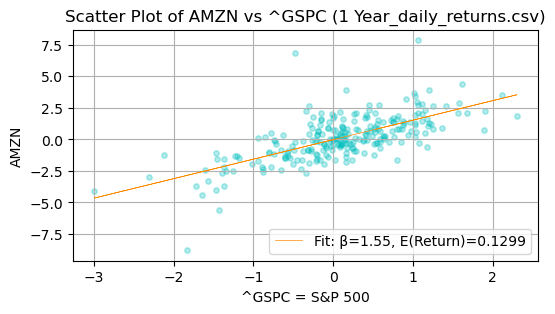

1 Y_NVDA beta is 2.66
Estimated Market Return 19.67%


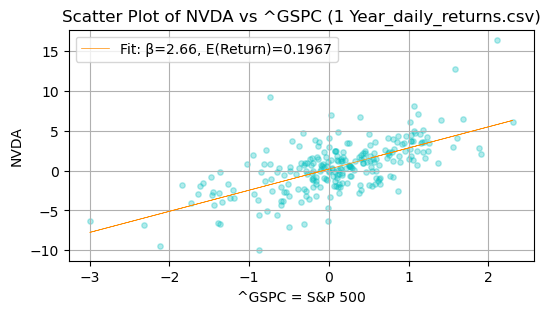

1 Y_TSLA beta is 2.13
Estimated Market Return 16.50%


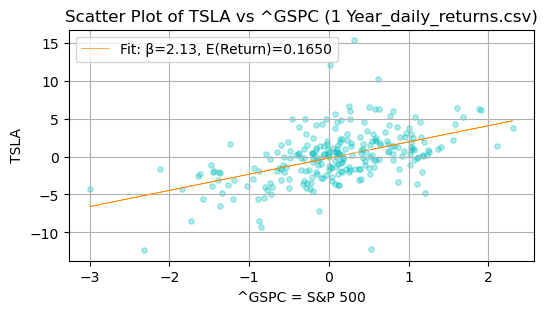

1 Y_META beta is 1.56
Estimated Market Return 13.08%


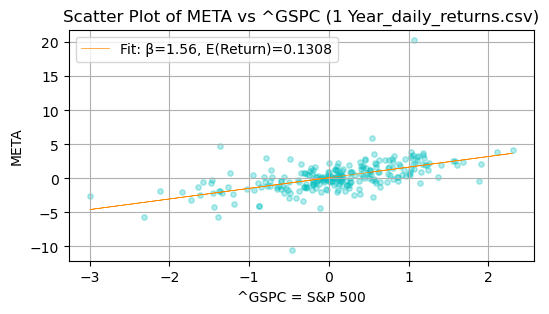

1 Y_^GSPC beta is 1.00
Estimated Market Return 9.71%


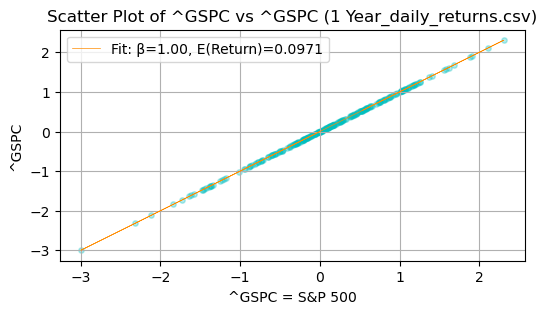

2 Y_AAPL beta is 1.19
Estimated Market Return 8.75%


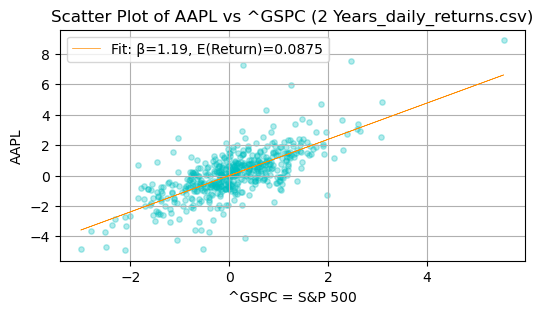

2 Y_MSFT beta is 1.26
Estimated Market Return 9.01%


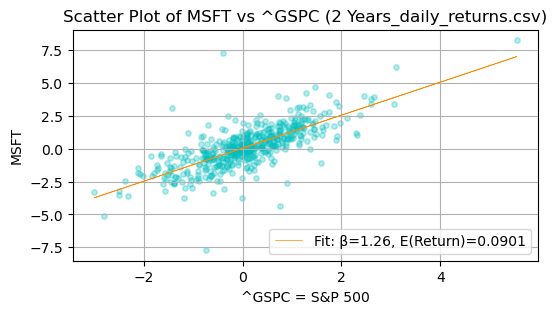

2 Y_GOOGL beta is 1.33
Estimated Market Return 9.33%


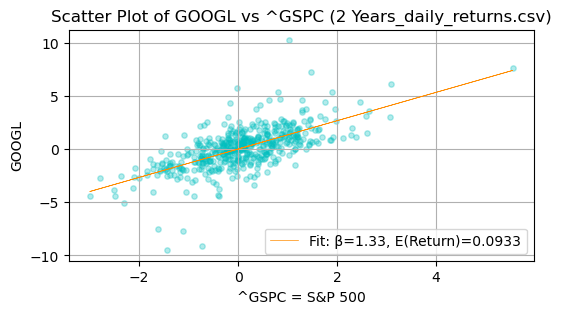

2 Y_AMZN beta is 1.52
Estimated Market Return 10.11%


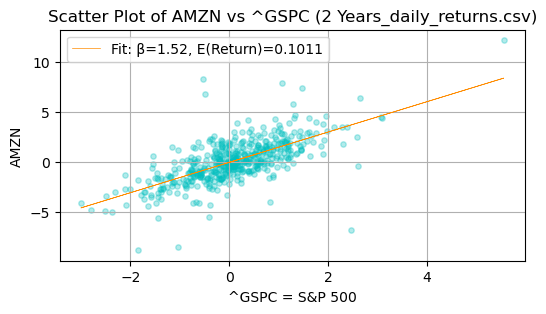

2 Y_NVDA beta is 2.29
Estimated Market Return 13.37%


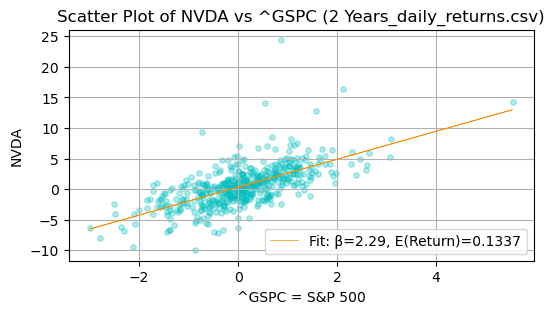

2 Y_TSLA beta is 1.90
Estimated Market Return 11.75%


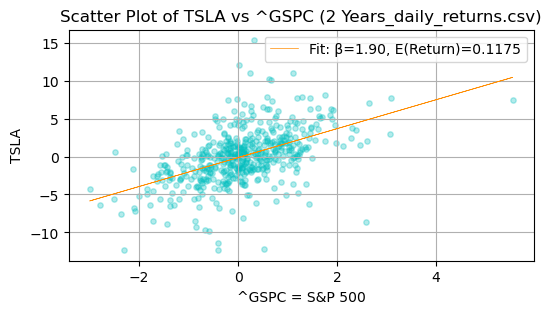

2 Y_META beta is 1.64
Estimated Market Return 10.62%


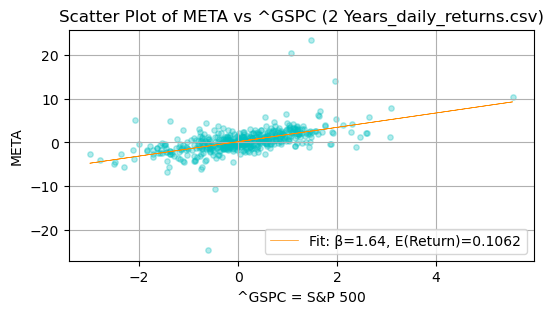

2 Y_^GSPC beta is 1.00
Estimated Market Return 7.93%


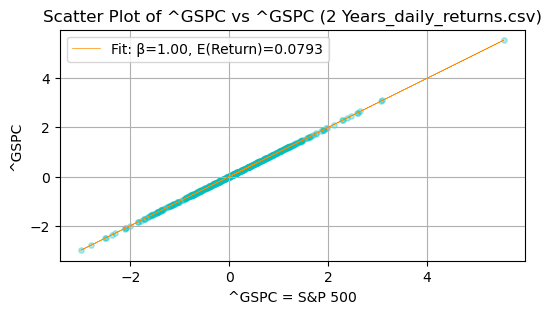

In [260]:
def plot_daily(file_paths, tickers):
    results = {}
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        
        if file_path not in results:
            results[file_path] = {}
        
        for ticker in tickers:
            plt.figure(figsize=(6, 3))

            # Scatter plot
            df.plot(kind='scatter', x='^GSPC', y=ticker, color='c', s=15, alpha=0.3, ax=plt.gca())
            
            # Linear regression
            beta, alpha = np.polyfit(df['^GSPC'], df[ticker], 1)
            
            rm = df['^GSPC'].iloc[1:].mean()  # Skip the first row
            
            e_return = rf + (beta * (rm - rf))
            
            # Print the results
            print(f'{file_path[:3]}_{ticker} beta is {beta:.2f}')
            print(f'Estimated Market Return {e_return * 100:.2f}%')
            
            # Regression line
            plt.plot(df['^GSPC'], beta * df['^GSPC'] + alpha, '-', color='darkorange', linewidth=0.5,label=f'Fit: β={beta:.2f}, E(Return)={e_return:.4f}')
            
            plt.title(f'Scatter Plot of {ticker} vs ^GSPC ({file_path})')
            plt.xlabel('^GSPC = S&P 500')
            plt.ylabel(ticker)
            plt.legend()
            plt.grid(True)  # Add grid for better readability
            plt.savefig(f'{file_path[:3]}_{ticker}_stock_return_graph.jpg', format='jpg', dpi=300)
            plt.show()
            
            results[file_path][ticker] = {
                'beta': round(beta, 3),
                'e_return': round(e_return * 100, 3)  # Convert to percentage
            }


    return results            
            
            
file_paths = ['6 Months_daily_returns.csv','1 Year_daily_returns.csv','2 Years_daily_returns.csv']
results = plot_daily(file_paths, tickers)

In [255]:
def results_to_df(results):
    # Flatten the nested dictionary
    flattened_results = []
    for file_path, tickers_data in results.items():
        for ticker, metrics in tickers_data.items():
            flattened_results.append({
                'file_path': file_path,
                'ticker': ticker,
                'beta': metrics['beta'],
                'e_return': metrics['e_return']
            })
    
    # Create DataFrame
    results_df = pd.DataFrame(flattened_results)
    results_df['file_path'] = results_df['file_path'].str.slice(0, -18)
    return results_df

# Example usage
results_df = results_to_df(results)
sortedresults = results_df.sort_values(by='e_return', ascending =False)

# print(results_df)
six_month_res = results_df[results_df['file_path'].str.contains('6 Months')].sort_values(by='e_return',ascending=False)
one_year_res = results_df[results_df['file_path'].str.contains('1 Year')].sort_values(by='e_return',ascending=False)
two_year_res = results_df[results_df['file_path'].str.contains('2 Year')].sort_values(by='e_return',ascending=False)

In [256]:
sortedresults

,file_path,ticker,beta,e_return
12,1 Year,NVDA,2.656,19.666
13,1 Year,TSLA,2.129,16.502
4,6 Months,NVDA,2.942,14.888
20,2 Years,NVDA,2.288,13.375
14,1 Year,META,1.561,13.084
11,1 Year,AMZN,1.546,12.994
5,6 Months,TSLA,2.403,12.836
21,2 Years,TSLA,1.904,11.753
10,1 Year,GOOGL,1.313,11.596
22,2 Years,META,1.636,10.619



### Introduction
This report provides an analysis of the performance of selected stocks over different time periods. The key metrics analyzed include Beta (a measure of volatility) and the expected return on investment (e_return).

### Summary of Findings
Key Findings
##### NVIDIA (NVDA)
6 Months: 	Beta 2.942	Expected Return 14.888%

1 Year:	Beta 2.656	Expected Return 19.666%

2 Years:	Beta 2.288 	Expected Return 13.375%

Analysis: NVDA offers the highest returns but with significant volatility, especially in the short term.

##### Tesla (TSLA)
6 Months: 	Beta 2.403	 Expected Return 12.836%

1 Year: 	Beta 2.129 	Expected Return 16.502%

2 Years: 	Beta 1.904	Expected Return 11.753%

Analysis: TSLA provides strong returns with volatility that decreases over time.

##### Meta Platforms (META)
6 Months: 	Beta 1.336	Expected Return 8.779%

1 Year: 	Beta 1.561	Expected Return 13.084%

2 Years: 	Beta 1.636	Expected Return 10.619%

Analysis: META shows moderate returns and lower volatility compared to NVDA and TSLA.

##### Amazon (AMZN)
6 Months:	Beta 1.427 	Expected Return 9.126%

1 Year: 	Beta 1.546	Expected Return 12.994%

2 Years: 	Beta 1.517	Expected Return 10.114%

Analysis: AMZN provides stable performance with moderate returns and volatility.

##### Alphabet (GOOGL)
6 Months: 	Beta 1.250	Expected Return 8.454%

1 Year: 	Beta 1.313	Expected Return 11.596%

2 Years: 	Beta 1.332	Expected Return 9.333%

Analysis: GOOGL is a stable choice with lower volatility and decent returns.

##### Microsoft (MSFT)
6 Months:	Beta 1.106	Expected Return 7.906%

1 Year:	Beta 1.089	Expected Return 10.248%

2 Years: 	Beta 1.255	Expected Return 9.010%

Analysis: MSFT provides stability with lower volatility and steady returns.

##### Apple (AAPL)
6 Months: 	Beta 1.039	Expected Return 7.651%

1 Year: 	Beta 0.972	Expected Return 9.543%

2 Years: 	Beta 1.194 	Expected Return 8.750%

Analysis: AAPL has the lowest Beta, indicating minimal volatility, but also offers lower returns.

#### Conclusion
High Risk, High Return: NVDA and TSLA lead in expected returns but come with high volatility.

Moderate Risk: META, AMZN, and GOOGL offer balanced options with moderate returns and volatility.

Low Risk: MSFT and AAPL provide stable performance with lower volatility, making them ideal for conservative investors.

Benchmark: The S&P 500 (^GSPC) serves as a safe market benchmark for more risk-averse investors.

#### Recommendations
For Aggressive Investors: If you can tolerate high volatility for the potential of high returns, consider investing in NVDA or TSLA. Both stocks have shown substantial returns but come with higher risk.

For Moderate Risk Investors: META, AMZN, and GOOGL offer a balanced profile with good returns and moderate volatility. These stocks are well-suited for investors seeking growth with manageable risk.

For Conservative Investors: If you prioritize stability and lower volatility over high returns, MSFT and AAPL are ideal choices. These stocks provide steady growth with reduced market fluctuations.
